# Decode Thetis Log Files
This script will demonstrate how we can decode the binary log files generated by the Thetis instrumentation package and display them for analysis

Author: Braidan Duffy  
Date Published: 2022-11-20  
Version: 1.0.0  
Date Updated:  

## Changelog
### Version 1.0.0 - 2022-11-20
Initial Release

In [2]:
# Import relevant libraries
from ctypes import *
import matplotlib.pyplot as plt
import datetime as DT
import pandas as pd

Thetis uses a known data structure that stores all of the measured and calculated data within set memory boundaries. This structure is written to the log file sequentially, so if we can define the structure here and determine how big each "block" of data is, we can parse the data log for the appropriate values.

In [3]:
class ThetisData(Structure):
    _fields_ = [('epoch', c_long),
                ('mSecond', c_ulong),
                ('GPSYear', c_uint16),
                ('GPSMonth', c_uint8),
                ('GPSDay', c_uint8),
                ('GPSHour', c_uint8),
                ('GPSMinute', c_uint8),
                ('GPSSecond', c_uint8),
                ('GPSHundredth', c_uint8),
                ('voltage', c_float),
                ('GPSFix', c_bool),
                ('numSats', c_uint8),
                ('HDOP', c_uint8),
                ('latitude', c_long),
                ('longitude', c_long),
                ('GPSSpeed', c_long),
                ('GPSCourse', c_long),
                ('sysCal', c_uint8),
                ('gyroCal', c_uint8),
                ('accelCal', c_uint8),
                ('magCal', c_uint8),
                ('rawAccelX', c_float),
                ('rawAccelY', c_float),
                ('rawAccelZ', c_float),
                ('accelX', c_float),
                ('accelY', c_float),
                ('accelZ', c_float),
                ('rawGyroX', c_float),
                ('rawGyroY', c_float),
                ('rawGyroZ', c_float),
                ('gyroX', c_float),
                ('gyroY', c_float),
                ('gyroZ', c_float),
                ('rawMagX', c_float),
                ('rawMagY', c_float),
                ('rawMagZ', c_float),
                ('magX', c_float),
                ('magY', c_float),
                ('magZ', c_float),
                ('roll', c_float),
                ('pitch', c_float),
                ('yaw', c_float),
                ('linAccelX', c_float),
                ('linAccelY', c_float),
                ('linAccelZ', c_float),
                ('quatW', c_float),
                ('quatX', c_float),
                ('quatY', c_float),
                ('quatZ', c_float),
                ('imuTemp', c_float),
                ('state', c_uint8)]

Now, we can read in the log file and parse it - pulling out whatever data points we need and storing them into lists that we can access later during plotting.

In [31]:
with open('data/GPS_Test_Indialantic_10Hz.bin', 'rb') as file:
    epoch_data = []
    mSecond_data = []
    gps_time_data = []
    voltage_data = []
    gps_fix_data = []
    num_sats_data = []
    hdop_data = []
    lat_data = []
    lon_data = []
    gps_speed_data = []
    gps_course_data = []
    sys_cal_data = []
    gyro_cal_data = []
    accel_cal_data = []
    mag_cal_data = []
    raw_accel_data = []
    accel_data = []
    raw_gyro_data = []
    gyro_data = []
    raw_mag_data = []
    mag_data = []
    attitude_data = []
    lin_accel_data = []
    quaternion_data = []
    imu_temp_data = []
    state_data = []

    x = ThetisData()
    i = 0
    while file.readinto(x) == sizeof(x):
        i= i+1
        if (i % 9 != 0): # Only record every ninth item
            continue
        timestamp = DT.datetime.fromtimestamp(x.epoch + x.mSecond/1000)
        epoch_data.append(timestamp.isoformat(timespec='milliseconds'))
        gps_time_data.append((x.GPSYear, x.GPSMonth, x.GPSDay, x.GPSHour, x.GPSMinute, x.GPSSecond, x.GPSHundredth))
        gps_fix_data.append(x.GPSFix)
        hdop_data.append(x.HDOP)
        lat_data.append(x.latitude)
        lon_data.append(x.longitude)
        raw_accel_data.append((x.rawAccelX, x.rawAccelY, x.rawAccelZ))
        accel_data.append((x.accelX, x.accelY, x.accelZ))
        lin_accel_data.append((x.linAccelX, x.linAccelY, x.linAccelZ))

# print(epoch_data)
df_epoch = pd.DataFrame(epoch_data,
                        columns=["ISO8601 Timestamp"])
df_gps = pd.DataFrame(  gps_time_data,
                        columns=["GPS Year", "GPS Month", "GPS Day", "GPS Hour", "GPS Minute", "GPS Second", "GPS Hundredth"])
df_gps["GPS Fix"] = gps_fix_data
df_gps["HDOP"] = hdop_data
df_gps["Latitude"] = lat_data
df_gps["Longitude"] = lon_data
df_gps["ISO8601 Timestamp"] = epoch_data
# with pd.ExcelWriter("output/epoch.xlsx") as writer:
    # df_epoch.to_excel(writer)
df_gps.to_excel("output/gps.xlsx", sheet_name="GPS Data")


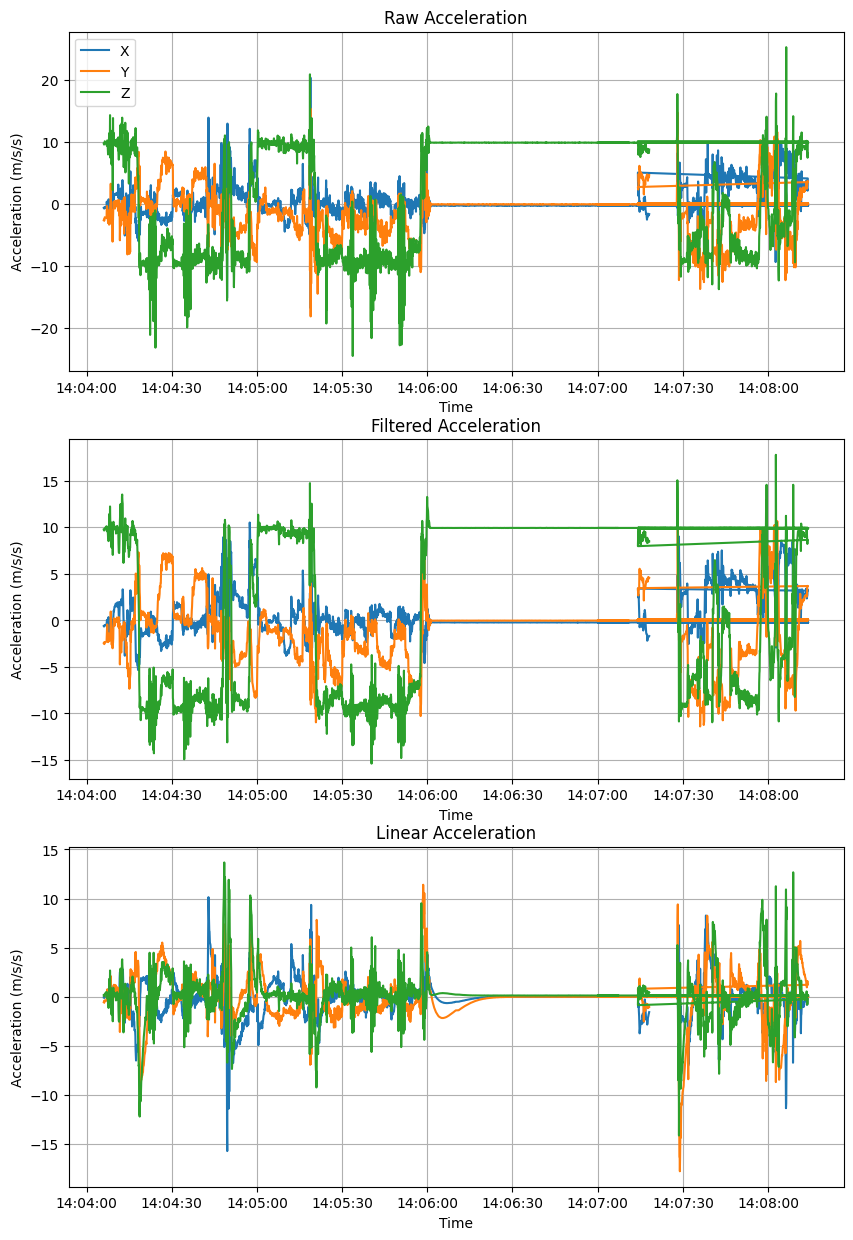

In [5]:
fig, ax = plt.subplots(3)
ax[0].plot(epoch_data, raw_accel_data)
ax[1].plot(epoch_data, accel_data)
ax[2].plot(epoch_data, lin_accel_data)

ax[0].set(xlabel='Time', ylabel='Acceleration (m/s/s)',
       title='Raw Acceleration')
ax[1].set(xlabel='Time', ylabel='Acceleration (m/s/s)',
       title='Filtered Acceleration')
ax[2].set(xlabel='Time', ylabel='Acceleration (m/s/s)',
       title='Linear Acceleration')
ax[0].grid()
ax[1].grid()
ax[2].grid()
ax[0].legend(["X", "Y", "Z"])

fig.set_figwidth(10)
fig.set_figheight(15)

# fig.savefig("test.png")
plt.show()